# Steam Demand Profile at the University of Illinois

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,9)
plt.rcParams['font.size'] = '16'
plt.style.use('ggplot')

from trends import seasonal_trend, plot_seasonal
from trends import season_colors as seasons

In [2]:
for i in [15,16,17,18,19]:
    if i is 15:
        df = pd.read_csv(f'../steamfy{i}.csv', index_col='Date and Time', parse_dates=True)
    else:
        df_new = pd.read_csv(f'../steamfy{i}.csv', index_col='Date and Time', parse_dates=True)
        df = pd.concat([df, df_new], axis=0)

In [3]:
df.rename(columns={'Date and Time':'time'}, inplace=True)

We use the equation

$$P_{th} = \dot{Q} = \dot{m}c_p\Delta T$$

This equation gives the thermal power required to heat a certain amount of water to a certain temperature. 

At 120$^\circ$C the $c_p$ of water is 4243.5 [J/kg K]

$\Delta T$ is 179$^\circ$C

Alternatively, we can use the change in enthalpy to calculate the power requirement. According to the master plan the inlet enthalpy is 196 BTU/lb and the outlet enthalpy after superheating is 1368 BTU/lb. 

We can convert to $P_{th}$ by 

$$P_{th} = \dot{m}\Delta h$$

Using the typical history of steam mass flow rates

In [4]:
h_in = 196 # BTU/lb
h_out = 1368 # BTU/lb
btu_to_kwh = 0.29307107


# times 0.29307107 to convert from BTU/hr to kilowatts
to_kwth = lambda mdot: (mdot*(h_out-h_in))*btu_to_kwh

In [5]:
df['kw'] = df['Value (KLBS/HR)'].apply(to_kwth)
# df['kw'].to_csv('../uiuc_steam_data.csv')

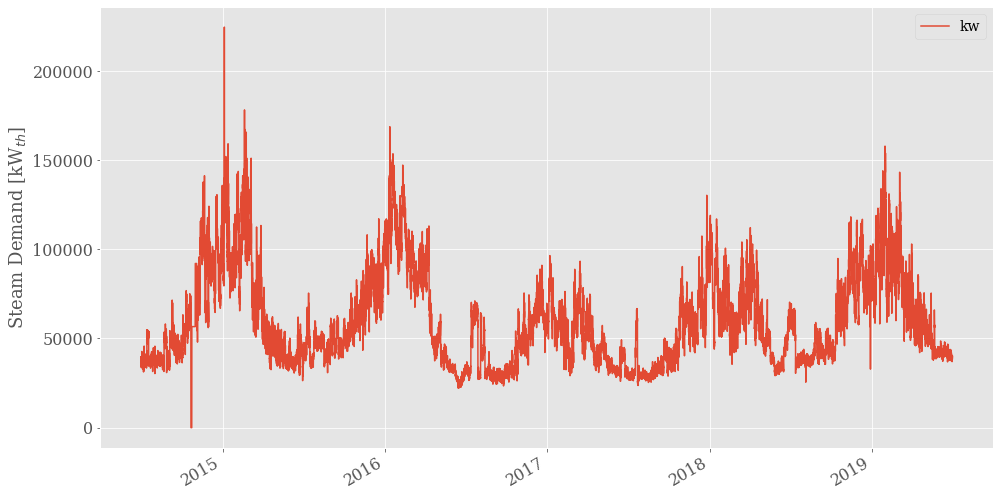

In [6]:
df.kw.plot(figsize=(16,9))
plt.ylabel(r'Steam Demand [kW$_{th}$]', fontsize=18)
plt.xlabel(r'', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)
plt.show()

In [7]:
distribution_df = seasonal_trend(df, column='kw',feature='dist')
distribution_df

,spring,spring_dist,summer,summer_dist,fall,fall_dist,winter,winter_dist
0,58712.504500,0.010427,38270.226063,0.010163,53157.647719,0.010307,84891.734542,0.010361
1,57950.115272,0.010291,37776.503142,0.010032,52027.017866,0.010088,83655.292552,0.010210
2,57720.787982,0.010251,37559.243896,0.009974,51611.811201,0.010007,83285.669900,0.010165
3,58031.723557,0.010306,37605.139533,0.009986,51523.577126,0.009990,83383.034274,0.010177
4,58552.477527,0.010398,37696.002062,0.010010,51748.528318,0.010034,83772.087053,0.010224
5,59282.143307,0.010528,37944.205907,0.010076,52346.413190,0.010150,84417.722968,0.010303
6,60621.115173,0.010766,38331.117190,0.010179,53477.339263,0.010369,86263.711838,0.010528
7,63454.627414,0.011269,39406.152220,0.010464,56901.909455,0.011033,90672.370491,0.011066
8,63786.910115,0.011328,40159.298462,0.010664,58381.422381,0.011320,92538.734170,0.011294
9,62602.626814,0.011118,40578.997852,0.010776,57253.324885,0.011101,90596.838755,0.011057


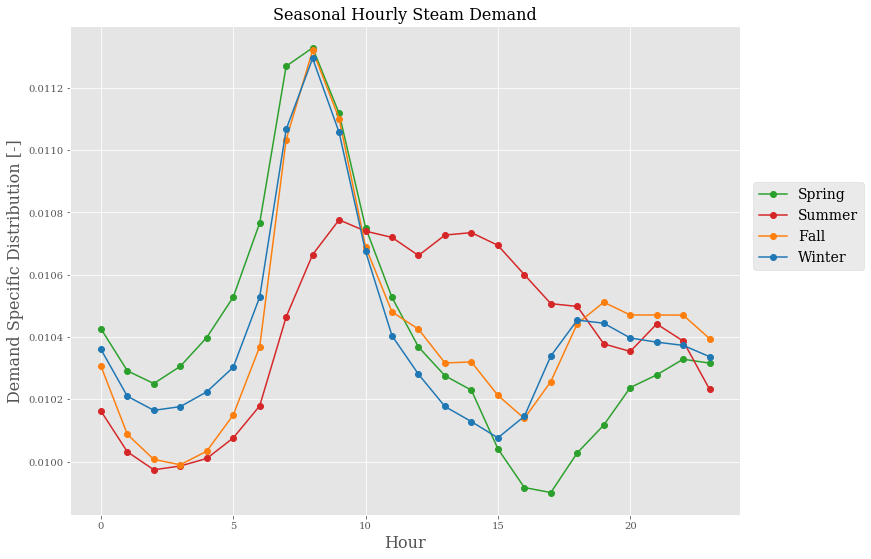

In [10]:
fig, ax = plot_seasonal(distribution_df, 
                        feature='dist', 
                        title='Seasonal Hourly Steam Demand',
                        xlabel='Hour',
                        ylabel='Demand Specific Distribution [-]')

In [11]:
stm_years = df.groupby(df.index.year)
years = np.arange(2015,2020,1)

steam_demand = np.array([stm_years.get_group(y).kw.sum() for y in years]).mean()
steam_demand/1e6  # GWh(th)

465.15998065199295

In [14]:
total = 0.0
for season in seasons:
    data = distribution_df[season+"_dist"]
    for i,value in enumerate(data):
        total += value
        print(f"INSERT INTO \"DemandSpecificDistribution\" VALUES ('UIUC','{season}','H{i+1}','HEAT',{value},'');")

INSERT INTO "DemandSpecificDistribution" VALUES ('UIUC','spring','H1','HEAT',0.010426878939360876,'');
INSERT INTO "DemandSpecificDistribution" VALUES ('UIUC','spring','H2','HEAT',0.010291484609781194,'');
INSERT INTO "DemandSpecificDistribution" VALUES ('UIUC','spring','H3','HEAT',0.010250757886957604,'');
INSERT INTO "DemandSpecificDistribution" VALUES ('UIUC','spring','H4','HEAT',0.010305977599112405,'');
INSERT INTO "DemandSpecificDistribution" VALUES ('UIUC','spring','H5','HEAT',0.010398459407798452,'');
INSERT INTO "DemandSpecificDistribution" VALUES ('UIUC','spring','H6','HEAT',0.010528042310376271,'');
INSERT INTO "DemandSpecificDistribution" VALUES ('UIUC','spring','H7','HEAT',0.010765833180745229,'');
INSERT INTO "DemandSpecificDistribution" VALUES ('UIUC','spring','H8','HEAT',0.011269042665166706,'');
INSERT INTO "DemandSpecificDistribution" VALUES ('UIUC','spring','H9','HEAT',0.01132805345899232,'');
INSERT INTO "DemandSpecificDistribution" VALUES ('UIUC','spring','H10','HE